# Olympics Analysis

* In this notebook, we will analyze the Olympics which organize from 1896 to 2016.

* First of all, we will clean up data in our data set that does not make sense to us. On the other hand, we will remove some data from our data set, while filling in the missing data by averaging the other non-missing data for some data. 

* Then we will analyze univariate, bivariate, and multivariate data. We will use the Pivot Table when performing multivariate data analysis. 

* Then we will make anomaly detection. We will do this anomaly detection for the properties "Age", Weight" and "Height". After all, we will analyze our data over time.



In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [107]:
data = pd.read_csv("olympics.csv")
data.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### About The DataSet
* In this section, we will answer the basic questions necessary to get to know the data set, such as how many examples are in each column in the data set, what are the data types of these data, and what is the distribution of data types in the entire data set.


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


<a id='2'></a>
## Data Cleaning
* Removing and Editing Useless Data
* Missing Data Issue

### Removing and Editing Useless Data
* The "ID" column will be removed as it does not provide any information about the data set.
* Since the "Games" column is a combination of the "Year" and "Season" columns, it is considered useless data and can be removed.

In [109]:
data = data.drop(["ID", "Games"], axis = 1)
data.head()

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Missing Data Issue
* The concept of missing data means that the sample in the data set has no value in any column.
* For example, in a part of the data set below, NaN (Not a Number) is written in the height and weight columns of the example in the second index. This NaN text means that the height and weight data of the sample are missing.

In [110]:
data.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


* How to deal with missing data?
    1. Samples of missing data can be removed from the data.
    1. Missing data can be filled according to the mean or median values of the original data, without disturbing the distribution of the original data..
* While working on this data, 
    1. We will fill in the missing data in the "Height" and "Weight" columns according to the "Event" average.
    1. We will fill in the missing data in the "Age" column according to the average age of the data set.
    1. We will remove the athletes who did not receive medals from the data set.

#### Filling in the Missing Data of the Height and Weight Columns
* We will fill in the missing data in the "Height" and "Weight" columns according to the "Event" average.

In [111]:
unique_event = pd.unique(data.Event)
print("Number of Unique Events: {}".format(len(unique_event)))
unique_event[:10]

Number of Unique Events: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [112]:
temp_data = data.copy()
height_weight_list = ["Height", "Weight"]
for event in unique_event:
    
    event_filter = temp_data.Event == event
    filter_data = temp_data[event_filter]
    
    for height_weight in height_weight_list:
        mean = np.round(np.mean(filter_data[height_weight]),2)
        if ~np.isnan(mean):
            filter_data[height_weight] = filter_data[height_weight].fillna(mean)
        else:
            all_data_mean = np.round(np.mean(data[height_weight]),2)
            filter_data[height_weight] = filter_data[height_weight].fillna(all_data_mean)        
    temp_data[event_filter] = filter_data

data = temp_data.copy() 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Gender  271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


#### Filling in the Missing Data of the Age Column
* We will fill in the missing data in the "Age" column according to the average age of the data set.

In [113]:
age_mean = np.round(np.mean(data.Age),2)
print("MEan of Age: {}".format(age_mean))
data["Age"] = data["Age"].fillna(age_mean)
data.info()

MEan of Age: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Gender  271116 non-null  object 
 2   Age     271116 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


#### Removing Non-Medal Athletes from the Data Set
* We will remove the athletes who did not receive medals from the data set.

In [114]:
medal = data["Medal"]
pd.isnull(medal).sum()

231333

In [115]:
medal_filter = ~pd.isnull(medal)
data = data[medal_filter]
data.head(5)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    39783 non-null  object 
 1   Gender  39783 non-null  object 
 2   Age     39783 non-null  float64
 3   Height  39783 non-null  float64
 4   Weight  39783 non-null  float64
 5   Team    39783 non-null  object 
 6   NOC     39783 non-null  object 
 7   Year    39783 non-null  int64  
 8   Season  39783 non-null  object 
 9   City    39783 non-null  object 
 10  Sport   39783 non-null  object 
 11  Event   39783 non-null  object 
 12  Medal   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [117]:
data.to_csv("cleared_olimpics.csv", index=False)

<a id='3'></a>
## Univariate Data Analysis
In this section, we will examine the numerical and categorical data in the data set one by one.
* Numerical Variables:
    1. Age   
    1. Height
    1. Weight
    1. Year
* Categorical Variables:
    1. Name
    1. Gender
    1. Team
    1. NOC
    1. Season
    1. City
    1. Sport
    1. Event
    1. Medal

### Numerical Variables
* There are 4 numerical variables in the data set. These are:     
    1. Age   
    1. Height
    1. Weight
    1. Year
* We will use data frequency and basic statistical knowledge to examine and interpret numerical variables.
* We will examine the data frequency information through the histogram graph.
* We will interpret the basic statistics information with the help of the box chart.

In [118]:
def plotHistogram(x):
    
    plt.figure()
    plt.hist(data[x], bins = 85, color = "orange")
    plt.xlabel(x)
    plt.ylabel("Frequency")
    plt.title("Data Frequency  - {}".format(x))
    plt.show()

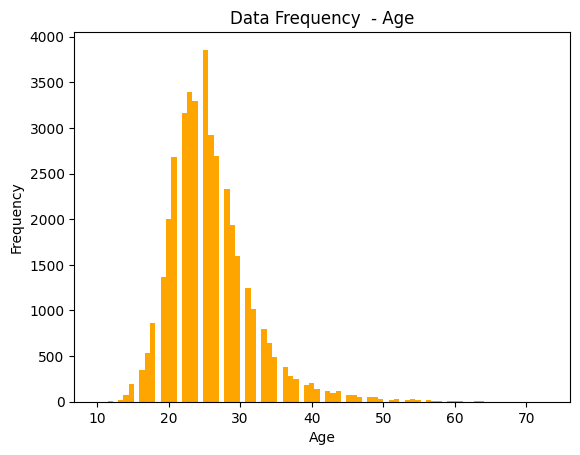

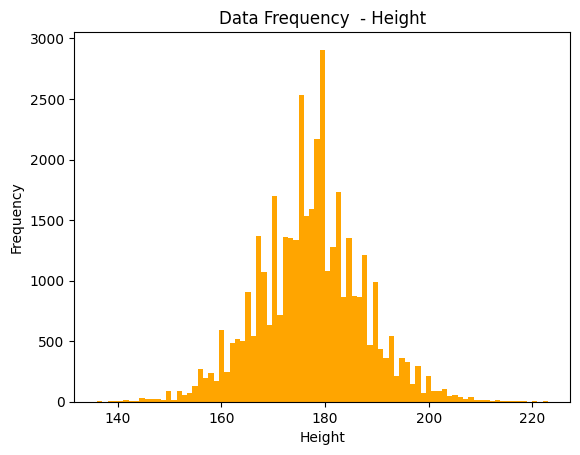

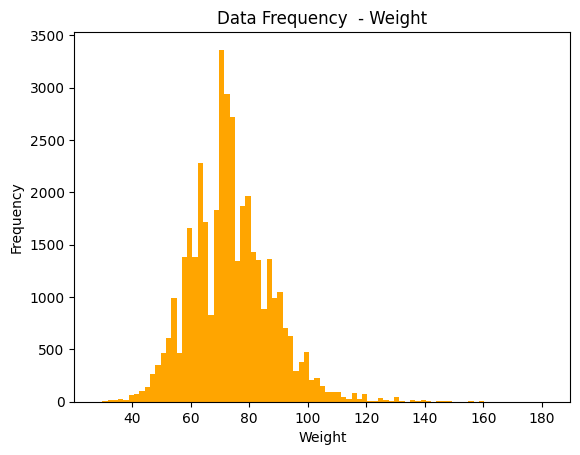

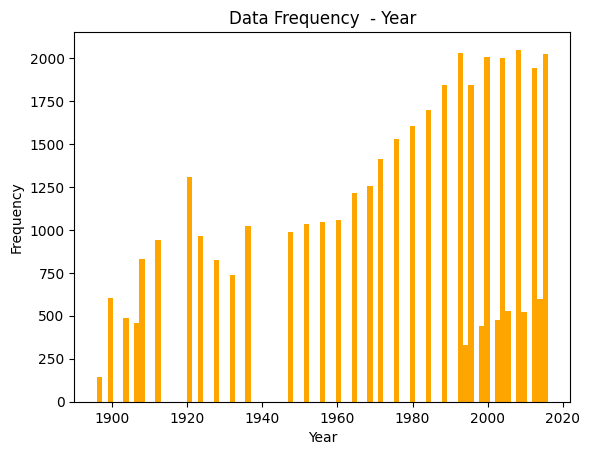

In [119]:
numeric_features = ["Age", "Height", "Weight", "Year"]
for i in numeric_features:
    plotHistogram(i)

* As expected, there is a distribution close to the normal distribution in the "Age", "Weight" and "Height" columns.
* In the "Year" column, the first thing that stands out is that the Olympics were not held during the wars in the last century, and that the Olympics were held more in the last 20 years than in previous years.

In [120]:
data.describe() 

,Age,Height,Weight,Year
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


* Statistical properties of numerical data
    1. count: Number of Samples
    1. mean
    1. std: Standard deviation
    1. min: Minimum
    1. 25%: First Quarter
    1. 50%: Median
    1. 75%: Third Quarter
    1. max: Maximum

![Statistical Properties Box Plot](BoxPlot1.png)

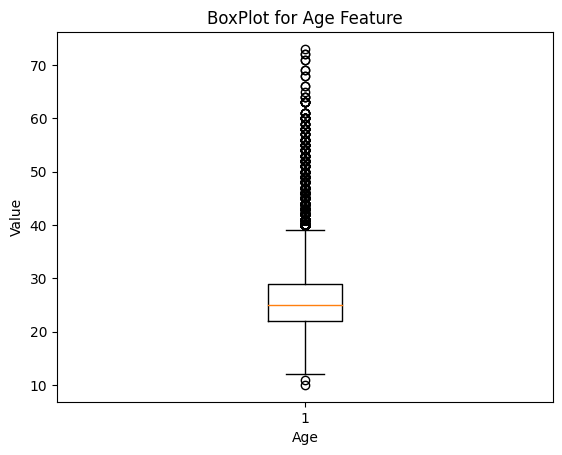

In [121]:
plt.boxplot(data.Age)
plt.title("BoxPlot for Age Feature")
plt.xlabel("Age")
plt.ylabel("Value")
plt.show()

### Categorical Variables
* There are 9 categorical variables in the data. These are:
    1. Name
    1. Gender
    1. Team
    1. NOC
    1. Season
    1. City
    1. Sport
    1. Event
    1. Medal
* We will use bar charts to examine and interpret categorical variables.

In [122]:
def plotBar(x,n = 5):

    data_ = data[x]
    counting_data = data_.value_counts()
    counting_data = counting_data[:n]
    plt.figure()
    plt.bar(counting_data.index, counting_data, color = "orange")
    plt.xticks(counting_data.index, counting_data.index.values)
    plt.xticks(rotation=75)
    plt.ylabel("Frequency")
    plt.title("Data Frequency - {}".format(x))
    plt.show()
    print("{}: \n {}".format(x, counting_data))
    

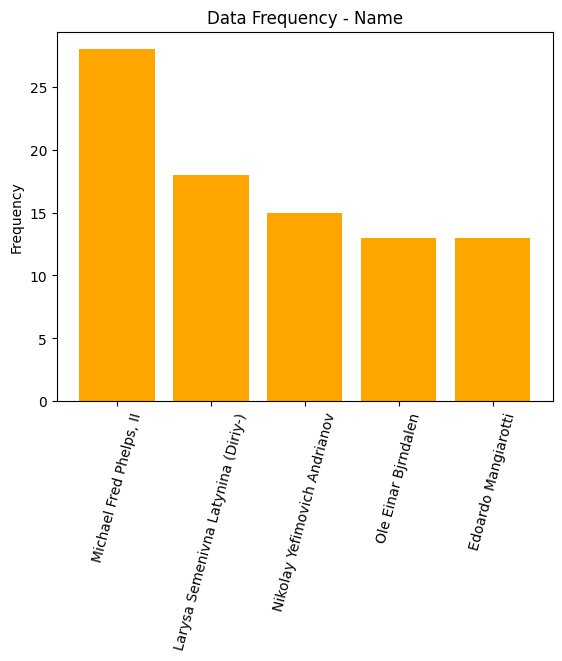

Name: 
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: Name, dtype: int64


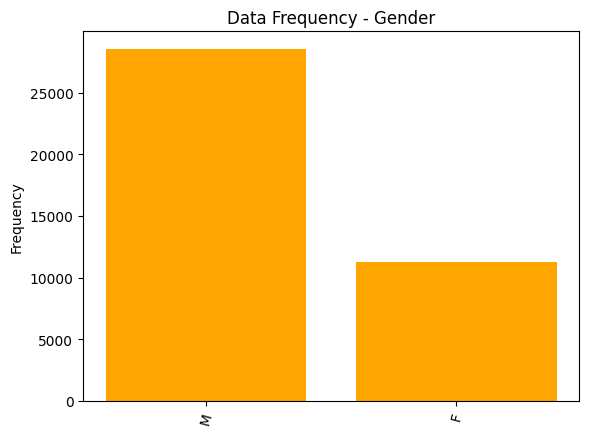

Gender: 
 M    28530
F    11253
Name: Gender, dtype: int64


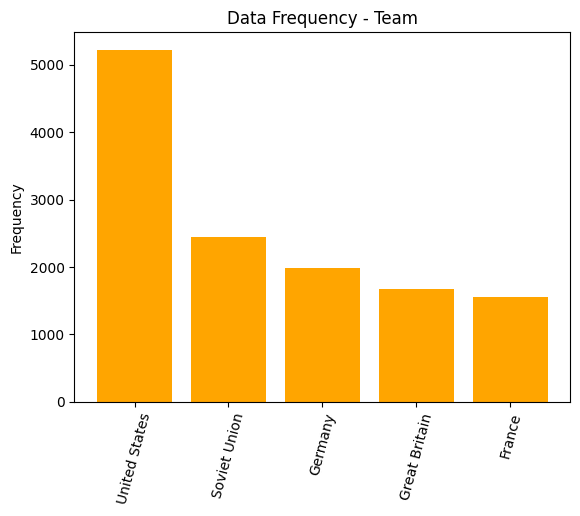

Team: 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: Team, dtype: int64


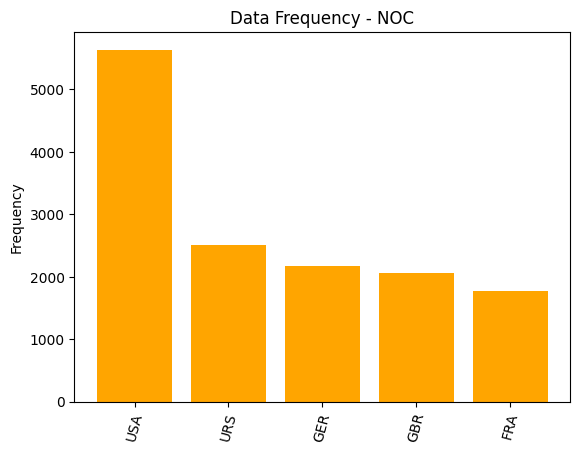

NOC: 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: NOC, dtype: int64


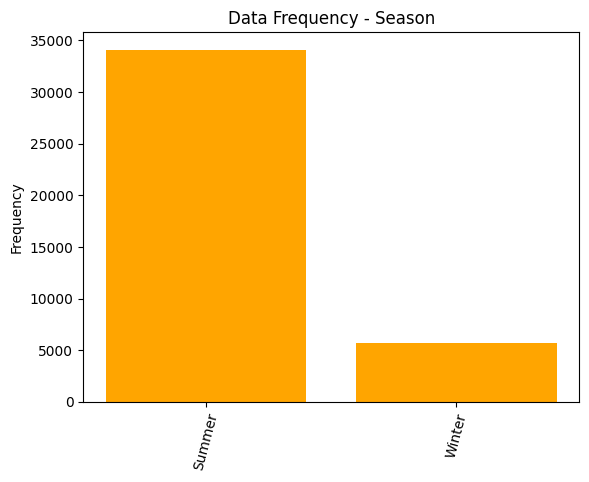

Season: 
 Summer    34088
Winter     5695
Name: Season, dtype: int64


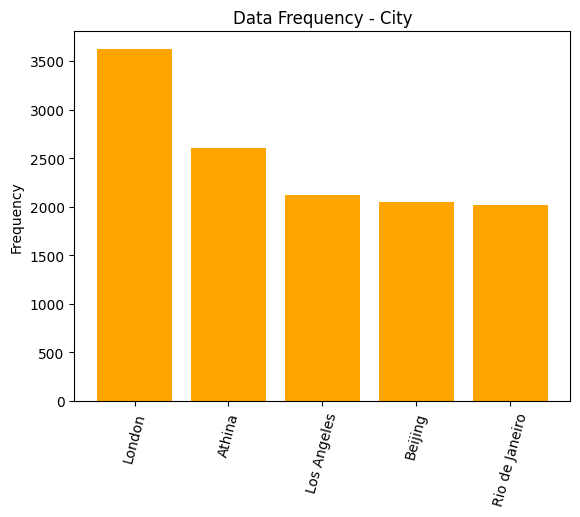

City: 
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: City, dtype: int64


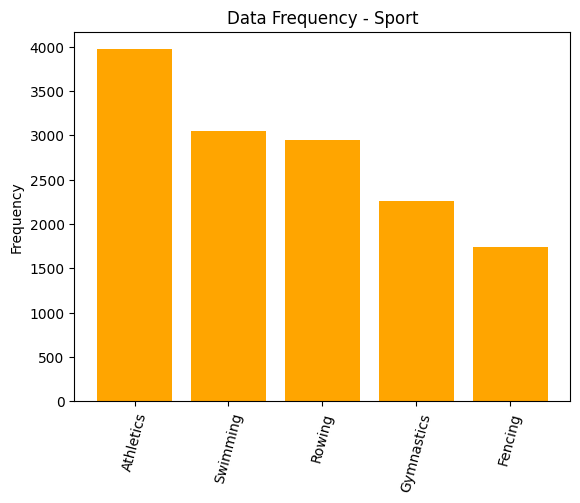

Sport: 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: Sport, dtype: int64


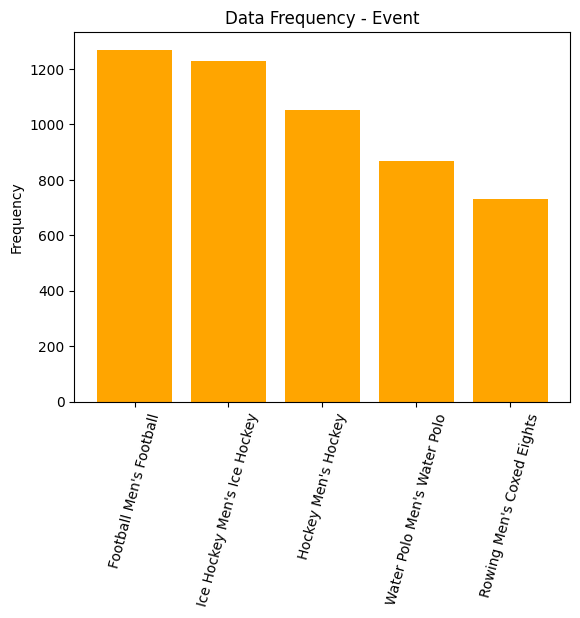

Event: 
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: Event, dtype: int64


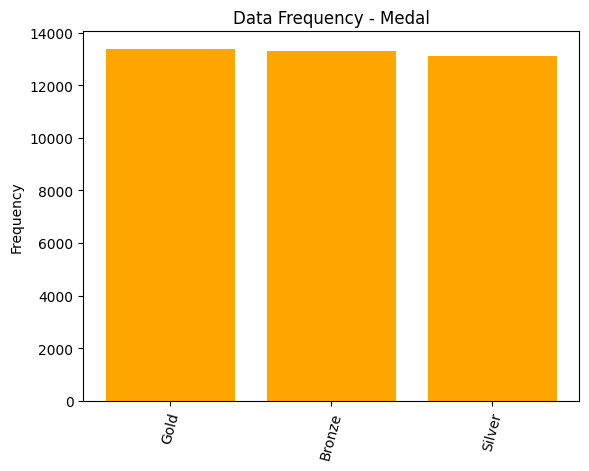

Medal: 
 Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


In [123]:
categorical_variable = ["Name", "Gender", "Team", "NOC", "Season", "City", "Sport", "Event", "Medal"]
for i in categorical_variable:
    plotBar(i)

* The name that has won the most medals in Olympic history is Michael Phelps.
* The ratio between male and female competitors is approximately 1:2.
* The United States has participated the most in the Olympics as a team.
* As expected, the "NOC" and "Team" outcomes are the same.
* The number of Olympics held in the summer season is more than that held in the winter season.
* The Olympics have been held the most in London.
* Athletics is the most competed sport in the Olympics.
* Men's soccer matches are the most played event.
* While it is expected that the medals awarded will be the same, differences have been observed.

<a id='4'></a>
## Bivariate Data Analysis
* In bivariate data analysis, we will examine the relationships between the medals won and other columns.
    1. Comparison of height and weight by gender
    1. Examination of the relationship between numerical columns
    1. Examination of the relationship between medals and age
    1. The number of gold, silver, and bronze medals won by teams
    1. Cities where the medals were won
    1. The number of gold, silver, and bronze medals won by gender 

#### Comparison of Height and Weight by Gender

In [124]:
men = data[data.Gender == "M"]
men.head(1)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold


In [125]:
women = data[data.Gender == "F"]
women.head(1)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
79,Ragnhild Margrethe Aamodt,F,27.0,163.0,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold


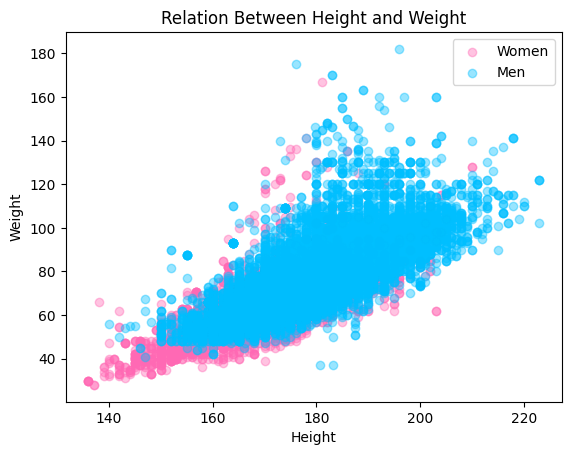

In [126]:
plt.figure()
plt.scatter(women.Height, women.Weight, alpha = 0.4, label = "Women", color="hotpink")
plt.scatter(men.Height, men.Weight, alpha = 0.4, label = "Men", color="deepskyblue")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Relation Between Height and Weight")
plt.legend()
plt.show()

* We understand that there is a positive relationship between height and weight.

#### Relationship Between Numerical Columns

In [127]:
data.loc[:,["Age","Height","Weight"]].corr()

,Age,Height,Weight
Age,1.000000,0.061890,0.136349
Height,0.061890,1.000000,0.794368
Weight,0.136349,0.794368,1.000000


* We can see the positive relationship between height and weight, which we saw in the previous chart, in the correlation table too.

#### Relationship Between Medals and Age

In [128]:
temp_data = data.copy()
temp_data = pd.get_dummies(temp_data, columns=['Medal'])
temp_data.head(2)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0


In [130]:
temp_data.loc[:,["Age","Medal_Bronze", "Medal_Gold","Medal_Silver"]].corr()

,Age,Medal_Bronze,Medal_Gold,Medal_Silver
Age,1.000000,-0.005584,-0.002576,0.008192
Medal_Bronze,-0.005584,1.000000,-0.504110,-0.496859
Medal_Gold,-0.002576,-0.504110,1.000000,-0.499022
Medal_Silver,0.008192,-0.496859,-0.499022,1.000000


#### The Number of Gold, Silver, and Bronze Medals Won by Teams

In [131]:
temp_data[["Team","Medal_Gold", "Medal_Silver", "Medal_Bronze"]].groupby(["Team"], as_index = False).sum().sort_values(by="Medal_Gold",ascending = False)[:10]

,Team,Medal_Gold,Medal_Silver,Medal_Bronze
462,United States,2474,1512,1233
403,Soviet Union,1058,716,677
165,Germany,679,627,678
215,Italy,535,508,484
171,Great Britain,519,582,572
149,France,455,518,577
420,Sweden,451,476,507
198,Hungary,432,330,365
67,Canada,422,413,408
117,East Germany,369,309,263


#### Cities Where the Medals Were Won

In [132]:
temp_data[["City","Medal_Gold", "Medal_Silver", "Medal_Bronze"]].groupby(["City"], as_index = False).sum().sort_values(by="Medal_Gold",ascending = False)[:10]

,City,Medal_Gold,Medal_Silver,Medal_Bronze
17,London,1215,1195,1214
3,Athina,883,859,860
18,Los Angeles,726,691,706
6,Beijing,671,667,710
27,Rio de Janeiro,665,655,703
38,Sydney,663,661,680
4,Atlanta,608,605,629
5,Barcelona,559,549,604
33,Seoul,520,513,549
2,Antwerpen,493,448,367


### The Number of Gold, Silver, and Bronze Medals Won by Gender 

In [133]:
temp_data[["Gender","Medal_Gold", "Medal_Silver", "Medal_Bronze"]].groupby(["Gender"], as_index = False).sum().sort_values(by="Medal_Gold",ascending = False)[:10]

,Gender,Medal_Gold,Medal_Silver,Medal_Bronze
1,M,9625,9381,9524
0,F,3747,3735,3771


<a id='5'></a>
## Multivariate Data Analysis

### Pivot Table
* A pivot table is a statistical table that summarizes a larger table, such as a database, business intelligence program, or data table. This summary may include totals, averages, or other statistics that group the pivot table in a meaningful way.

In [134]:
pivot_data = data.pivot_table(index="Medal", columns = "Gender",
                 values=["Height","Weight","Age"], 
                aggfunc={"Height":np.mean,"Weight":np.mean,"Age":[min, max, np.std]})
pivot_data.head()

Age                                            Height              \
         max         min             std                  mean               
Gender     F     M     F     M         F         M           F           M   
Medal                                                                        
Bronze  69.0  72.0  12.0  10.0  5.329229  5.870340  170.003227  180.045806   
Gold    63.0  64.0  13.0  13.0  5.219615  5.987807  170.448727  180.318906   
Silver  55.0  73.0  11.0  13.0  5.253111  6.098221  170.233783  180.053626   

           Weight             
             mean             
Gender          F          M  
Medal                         
Bronze  62.757125  77.841504  
Gold    63.199349  78.186505  
Silver  62.866892  77.960887

* In this table, we can see the averages of the height and weight parameters for different medals and genders, and the maximum, minimum and standard deviation of the age parameter.

<a id='6'></a>
## Anomaly Detection
* An outlier is a data point that differs significantly from other observations. An outlier may be due to variability in measurement or may indicate experimental error; the latter is sometimes removed from the dataset. An outlier can cause serious problems in statistical analysis.

![Anomaly Box Plot](BoxPlot2.png)

In [135]:
def anomalyDetection(df,feature):
    outlier_indices = []
    
    for c in feature:
        Q1 = np.percentile(df[c],25)
        Q3 = np.percentile(df[c],75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
    
    return multiple_outliers

In [136]:
anomaly_data = data.loc[anomalyDetection(data,["Age","Weight","Height"])]
anomaly_data.Sport.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: Sport, dtype: int64

* The sports branches in which anomaly is seen the most are as above.

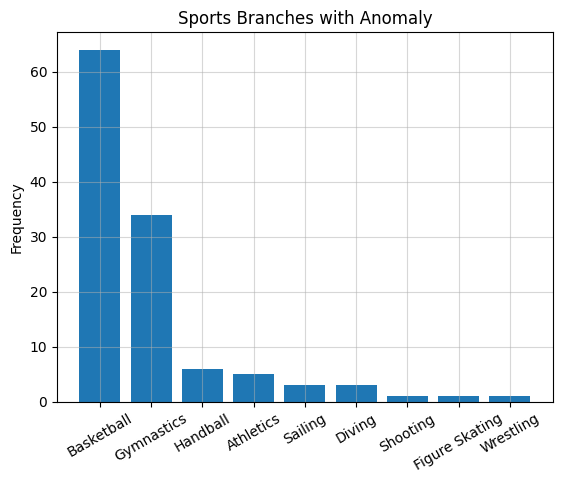

In [137]:
plt.figure()
plt.bar(anomaly_data.Sport.value_counts().index,anomaly_data.Sport.value_counts().values)
plt.xticks(rotation = 30)
plt.title("Sports Branches with Anomaly")
plt.ylabel("Frequency")
plt.grid(True,alpha = 0.5)
plt.show()

In [138]:
gym_data = anomaly_data[anomaly_data.Sport == "Gymnastics"]
gym_data

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
53759,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
69222,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
69225,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
80497,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


In [139]:
gym_data.Event.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: Event, dtype: int64

* When we examine the anomalous results in gymnastics, we see that the anomaly is due to the young ages and low weights of the athletes.
* Additionally, all of the anomalies in gymnastics are among female athletes.

In [140]:
basketball_data = anomaly_data[anomaly_data.Sport == "Basketball"]
basketball_data

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270119,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
270120,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
270121,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
270740,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


In [141]:
basketball_data.Event.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: Event, dtype: int64

* Anomaly has been detected due to the fact that male players playing basketball are tall and overweight.

<a id='7'></a>
## Data Analysis in Time Series
* Average Age, Height and Weight Change by Years
* Number of Medals by Years
* Number of Medals by Years and Seasons

In [142]:
time_data = data.copy()
time_data.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [143]:
unique_years = np.sort(time_data.Year.unique())
unique_years

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

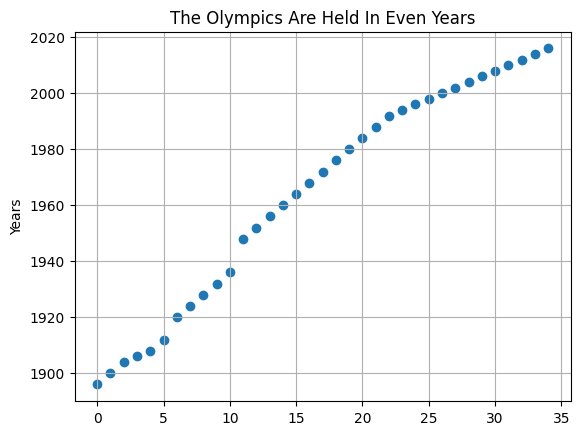

In [144]:
plt.figure()
plt.scatter(range(len(unique_years)),unique_years)
plt.grid(True)
plt.ylabel("Years")
plt.title("The Olympics Are Held In Even Years")
plt.show()

* Gaps in the chart are due to World War II. The reason for the getting tight in the graph in recent years is the separation of the summer and winter Olympics. The Olympics, held every 4 years, started to be organized every 2 years due to this separation.

In [145]:
date_time = pd.to_datetime(time_data['Year'], format='%Y')
print(type(date_time))
date_time.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: Year, dtype: datetime64[ns]

In [146]:
time_data["Date and Time"] = date_time
time_data.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Date and Time
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [147]:
time_data = time_data.set_index("Date and Time")
time_data.drop(["Year"],axis = 1,inplace= True)
time_data.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal
Date and Time,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


#### Average Age, Height and Weight Change by Years

In [148]:
periodic_data = time_data.resample("2A").mean()
periodic_data.head(10)

,Age,Height,Weight
Date and Time,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107
1910-12-31,NaN,NaN,NaN
1912-12-31,27.491945,176.890244,74.321467


In [149]:
periodic_data.dropna(axis=0,inplace = True)
periodic_data.head()

,Age,Height,Weight
Date and Time,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 640x480 with 0 Axes>

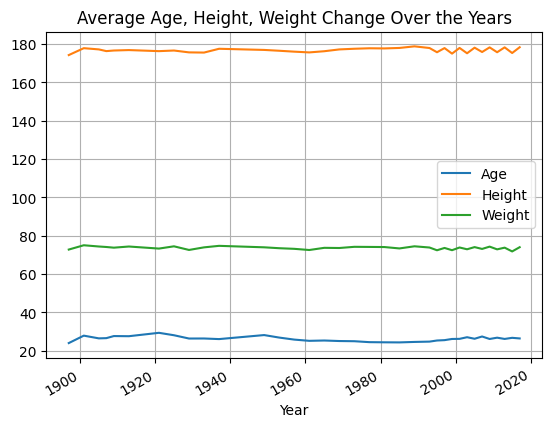

In [150]:
plt.figure()
periodic_data.plot()
plt.title("Average Age, Height, Weight Change Over the Years")
plt.xlabel("Year")
plt.grid(True)
plt.show()

#### Number of Medals by Years

In [151]:
time_data = pd.get_dummies(time_data, columns=['Medal'])
time_data.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
Date and Time,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [152]:
periodic_data = time_data.resample("2A").sum()

periodic_data = periodic_data.drop(["Age", "Height", "Weight"], axis=1)
periodic_data = periodic_data[~(periodic_data == 0).any(axis=1)]
periodic_data.tail()

,Medal_Bronze,Medal_Gold,Medal_Silver
Date and Time,,,
2008-12-31,710,671,667
2010-12-31,171,174,175
2012-12-31,679,632,630
2014-12-31,198,202,197
2016-12-31,703,665,655


<Figure size 640x480 with 0 Axes>

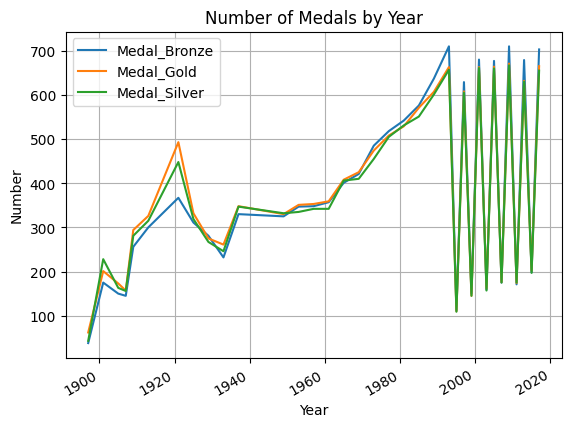

In [153]:
plt.figure()
periodic_data.loc[:,["Medal_Bronze", "Medal_Gold", "Medal_Silver"]].plot()
plt.title("Number of Medals by Year")
plt.ylabel("Number")
plt.xlabel("Year")
plt.grid(True)
plt.show()

* As can be seen in the graphic above, after the 2000s, the fluctuations in the number of medals become more. This is because the number of events held in the summer and winter Olympics and the corresponding number of medals differ.

#### Number of Medals by Years and Seasons

In [154]:
summer = time_data[time_data.Season == "Summer"]
winter = time_data[time_data.Season == "Winter"]
winter.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
Date and Time,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [155]:
periodic_data_winter = winter.resample("A").sum()

periodic_data_winter = periodic_data_winter.drop(["Age", "Height", "Weight"], axis=1)
periodic_data_winter = periodic_data_winter[~(periodic_data_winter == 0).any(axis=1)]
periodic_data_winter.head()

,Medal_Bronze,Medal_Gold,Medal_Silver
Date and Time,,,
1924-12-31,37,55,38
1928-12-31,31,30,28
1932-12-31,28,32,32
1936-12-31,35,36,37
1948-12-31,46,41,48


In [156]:
periodic_data_summer = summer.resample("A").sum()

periodic_data_summer = periodic_data_summer.drop(["Age", "Height", "Weight"], axis=1)
periodic_data_summer = periodic_data_summer[~(periodic_data_summer == 0).any(axis=1)]
periodic_data_summer.head()

,Medal_Bronze,Medal_Gold,Medal_Silver
Date and Time,,,
1896-12-31,38,62,43
1900-12-31,175,201,228
1904-12-31,150,173,163
1906-12-31,145,157,156
1908-12-31,256,294,281


<Figure size 640x480 with 0 Axes>

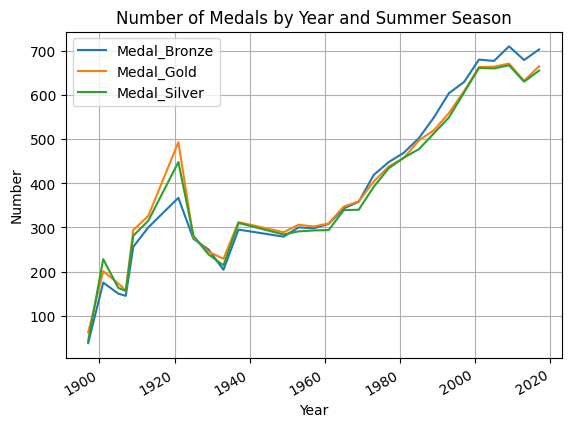

<Figure size 640x480 with 0 Axes>

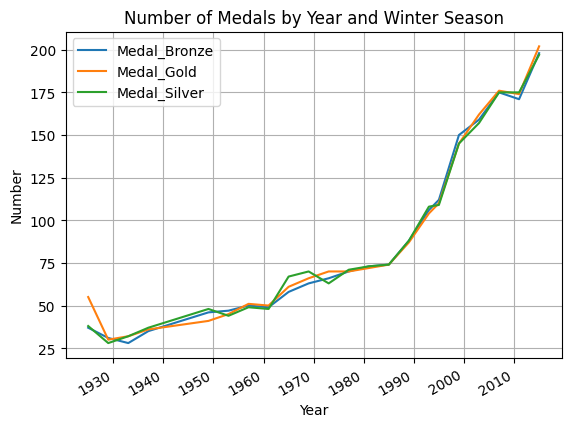

In [157]:
plt.figure()
periodic_data_summer.loc[:,["Medal_Bronze", "Medal_Gold", "Medal_Silver"]].plot()
plt.title("Number of Medals by Year and Summer Season")
plt.ylabel("Number")
plt.xlabel("Year")
plt.grid(True)
plt.show()

plt.figure()
periodic_data_winter.loc[:,["Medal_Bronze", "Medal_Gold", "Medal_Silver"]].plot()
plt.title("Number of Medals by Year and Winter Season")
plt.ylabel("Number")
plt.xlabel("Year")
plt.grid(True)
plt.show()